# Calculo de las metricas de un json

In [9]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

### Lectura del documento

In [10]:
# Ruta del archivo con los datos obtenidos por el "Tracking system"
file_path = './RESULT.json'

In [11]:
# Abrir el archivo json y cargarlo en la variable data
with open(file_path) as f:
    data = json.load(f)

# Se ordena la información del documento en base el timestamp
sorted_data = sorted(data, key=lambda x: x['timestamp'])

In [12]:
# Numero total de eventos
num_events = len(sorted_data)
# Indice de eventos
index = 0
sessions = []
sesion = 0
test_list = []
test = 0
pos_list = []


In [13]:
def parseEvent(event):
    global test_list
    global pos_list
    global sesion
    global test
    global sessions
    if event['typeEvent'] == "LoginEvent":
        test = 0
        print("\nInicio de sesion: ", sesion)
    elif event['typeEvent'] == "LogoutEvent":
        sessions.append(test_list.copy())
        test_list.clear()
        print("\nFin de sesion: ", sesion)
        sesion += 1
    # Empieza el test
    elif event['typeEvent'] == "StartTestEvent":
       print("\nInicio de test: ", test)
    # Acaba el test
    elif event['typeEvent'] == "EndTestEvent":
        test_list.append(pos_list.copy())
        pos_list.clear()
        print("\nFin de test: ", test)
        test += 1
    #Evento de movimeinto de un bot
    elif event['typeEvent'] == "BotPositionEvent":
        pos_list.append(event)
    return  True

In [14]:
# Recorro todos los eventos generados
while index < num_events:
    currentEvent = sorted_data[index]
    consumeEvent = parseEvent(currentEvent)
    index += 1


Inicio de sesion:  0

Inicio de test:  0

Fin de test:  0

Fin de sesion:  0

Inicio de sesion:  1

Inicio de test:  0

Fin de test:  0

Fin de sesion:  1


[{'id': 'bba533ccbd9eb540af99318025f9f880ba6fd2557f71dbb9b0a061be60bf7357',
  'idLevel': 0,
  'idSession': '83b1127847e5d83fd836f29a63fc84679bdd83cc93fe2f13a35e14b5ebcf85a8',
  'idUser': '9c1413019ba0d69935ef058b8408e65ccdaa4dd13f125f37894f0afe9a07d163',
  'timestamp': 1715888448996,
  'typeEvent': 'BotPositionEvent',
  'posX': 115.6942,
  'posZ': 55.75008,
  'updateByMove': 'Distance'},
 {'id': 'bba533ccbd9eb540af99318025f9f880ba6fd2557f71dbb9b0a061be60bf7357',
  'idLevel': 0,
  'idSession': '83b1127847e5d83fd836f29a63fc84679bdd83cc93fe2f13a35e14b5ebcf85a8',
  'idUser': '9c1413019ba0d69935ef058b8408e65ccdaa4dd13f125f37894f0afe9a07d163',
  'timestamp': 1715888448996,
  'typeEvent': 'BotPositionEvent',
  'posX': 110.8569,
  'posZ': 37.20548,
  'updateByMove': 'Distance'},
 {'id': '8dc161ef45019f65af34d6037e0d84a75746b7074247ed1a4931df56d83d963f',
  'idLevel': 0,
  'idSession': '83b1127847e5d83fd836f29a63fc84679bdd83cc93fe2f13a35e14b5ebcf85a8',
  'idUser': '9c1413019ba0d69935ef058b8408e6

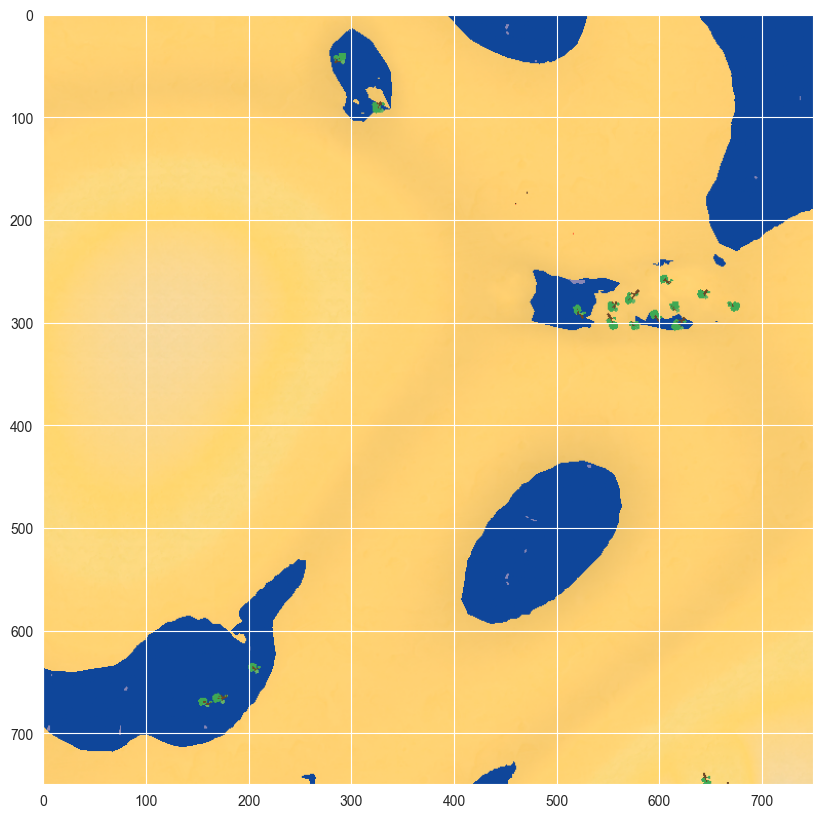

In [15]:
teses = []

# Definir las dimensiones del mapa
fig,ax = plt.subplots(figsize=(10,10)) #Tamaño en pulgadas de la imagen cuando se guarde

# Guardar la imagen del mapa
img = plt.imread("images/map2.png")
ax.imshow(img)

i = 0
for currentSession in sessions:
    for currentTest in currentSession:
        teses.extend(currentTest)


teses



In [16]:
dfTest = pd.DataFrame(teses)

# Dibujar el mapa de calor
dfTest.plot.hexbin(fig = fig, ax = ax,x="posX", y="posZ", reduce_C_function=sum, gridsize=(50,50), extent=[0,200,0,200], alpha=0.5, cmap='Reds')
ax.set_xticks(range(0, 200, 50))
ax.set_yticks(range(0, 200, 50))
fig.savefig('heatmap'+str(i)+'.png')
i +=1